In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tools import get_data
import seaborn as sns
import numpy as np

# Test 01 de Selección de Variables

* Tamaño de Muestra: 300 millones de datos
* N° de Bandas: 150
* N° de ROIs: 6

Definiciones:
 * Rango en el nivel de la Calidad: 1 - 5, donde 1 es alta calidad y 5 es baja calidad.
    * ROI B: Zona totalmente blanca.
    * ROI A y F: Zona con partes cuarteadas blancas.
    * ROI D: Zona parcialmente clara.
    * ROI C: Zona parcialmente obscura.
    * ROI E: Zona obscura.
 * Para efectos de la presente experimentación, asumiremos que la calidad alta del alimento se determina por una zona totalmente blanca y la calidad baja se determina por una zona tptalmente obscura.

In [2]:
path = "D:\\Documentos\\LUIS AUGUSTO\\UPN 2019-2\\Tesis\\Data\\test_01\\rois\\"

### Carga de Datos y Filtrado Inicial para datos entre la longitud de onda 400 y la banda 1000 (Bandas 49 - 124)

#### ROI A

In [3]:
A = get_data(path + 'A.roi.txt')
A.shape

(33992, 76)

#### ROI B

In [4]:
B = get_data(path + 'B.roi.txt')
B.shape

(36544, 76)

#### ROI C

In [5]:
C = get_data(path + 'C.roi.txt')
C.shape

(8244, 76)

#### ROI D

In [6]:
D = get_data(path + 'D.roi.txt')
D.shape

(54925, 76)

#### ROI E

In [7]:
E = get_data(path + 'E.roi.txt')
E.shape

(17494, 76)

#### ROI F

In [8]:
F = get_data(path + 'F.roi.txt')
F.shape

(34617, 76)

# Selección de Variables

In [17]:
from sklearn.feature_selection import SelectKBest, chi2
plt.rcParams["figure.figsize"] = (20,10)

#### Clasificamos el nivel de calidad en base a una escala de 0 a 100 con saltos de 25 unidades y las asignamos como salida esperada para cada ROI.

In [10]:
y_A = np.ones(A.shape[0]) + 50
y_B = np.ones(B.shape[0])
y_C = np.ones(C.shape[0]) + 25
y_D = np.ones(D.shape[0]) + 75
y_E = np.ones(E.shape[0]) + 100
y_F = np.ones(F.shape[0]) + 50

#### Realizamos la selección de variables mediante la Prueba Gamma en función a la función Chi-2 y el Ranking de Variables

In [11]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit_A = bestfeatures.fit_transform(A,y_A)
fit_B = bestfeatures.fit_transform(B,y_B)
fit_C = bestfeatures.fit_transform(C,y_C)
fit_D = bestfeatures.fit_transform(D,y_D)
fit_E = bestfeatures.fit_transform(E,y_E)
fit_F = bestfeatures.fit_transform(F,y_F)

#### De las 10 Bandas escogidas para cada ROI, 6 serán utilizadas para los modelos de entrenamiento y 4 para testear el modelo.

In [60]:
colors = ('b','g','r','c','m','y','#F23C00','#211663','#535353','#00E27C')

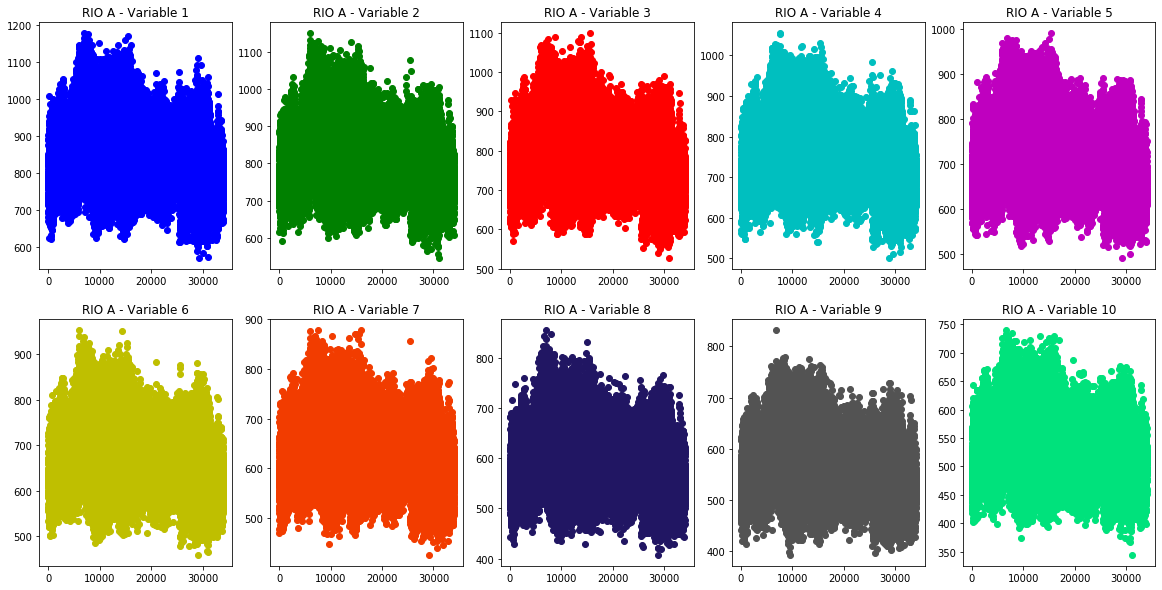

In [84]:
fig = plt.figure()

for x in range(0,10):
    plt.subplot(2, 5, x+1)
    plt.scatter(range(0,fit_A[:,x].shape[0]), fit_A[:,x], color=colors[x])
    plt.title('RIO A - Variable {}'.format(x+1))
plt.show()

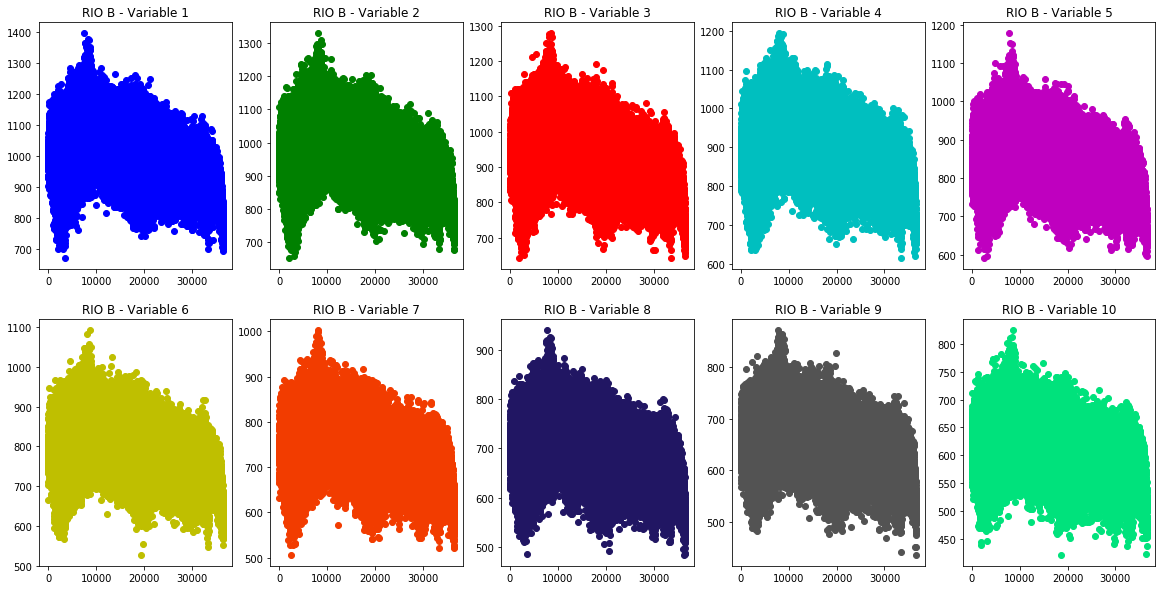

In [69]:
fig = plt.figure()

for x in range(0,10):
    plt.subplot(2, 5, x+1)
    plt.scatter(range(0,fit_B[:,x].shape[0]), fit_B[:,x], color=colors[x])
    plt.title('RIO B - Variable {}'.format(x+1))
plt.show()

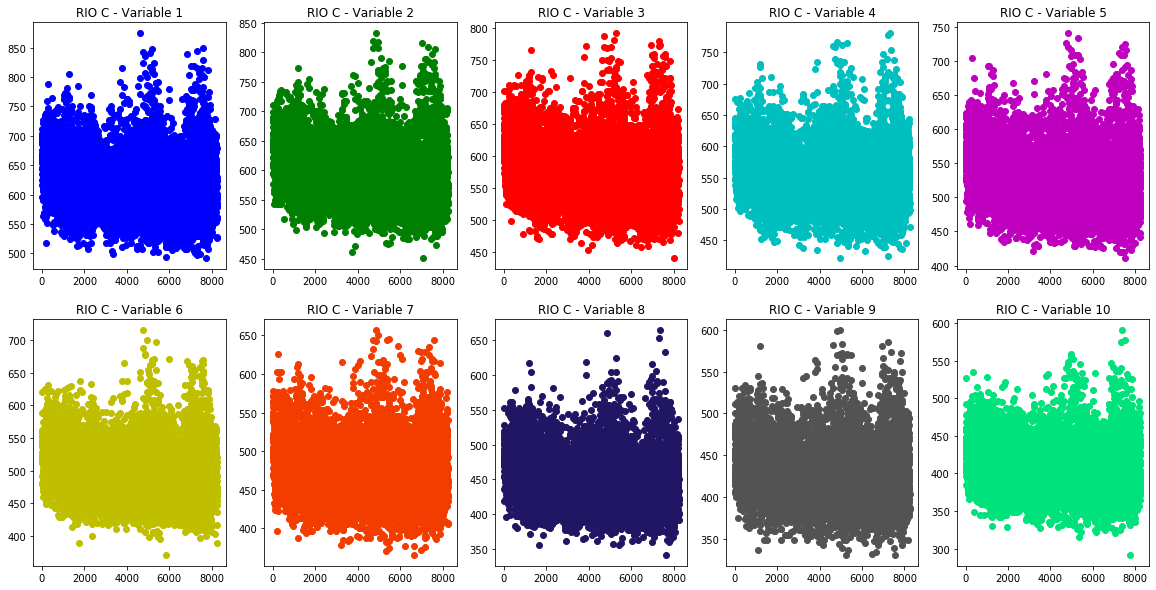

In [74]:
fig = plt.figure()

for x in range(0,10):
    plt.subplot(2, 5, x+1)
    plt.scatter(range(0,fit_C[:,x].shape[0]), fit_C[:,x], color=colors[x])
    plt.title('RIO C - Variable {}'.format(x+1))
plt.show()

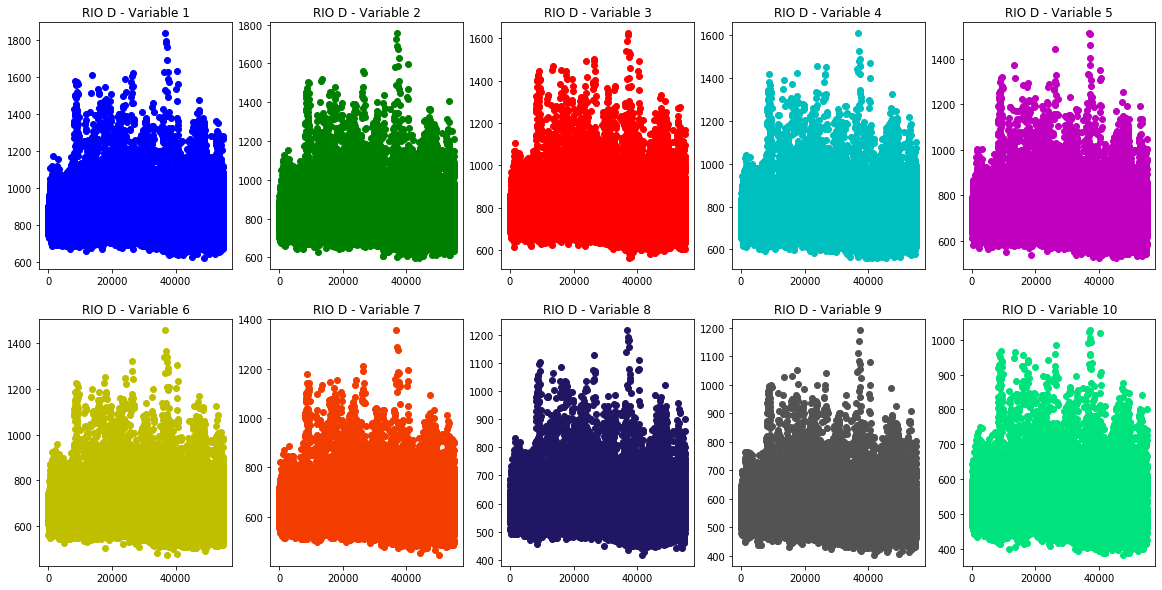

In [76]:
fig = plt.figure()

for x in range(0,10):
    plt.subplot(2, 5, x+1)
    plt.scatter(range(0,fit_D[:,x].shape[0]), fit_D[:,x], color=colors[x])
    plt.title('RIO D - Variable {}'.format(x+1))
plt.show()

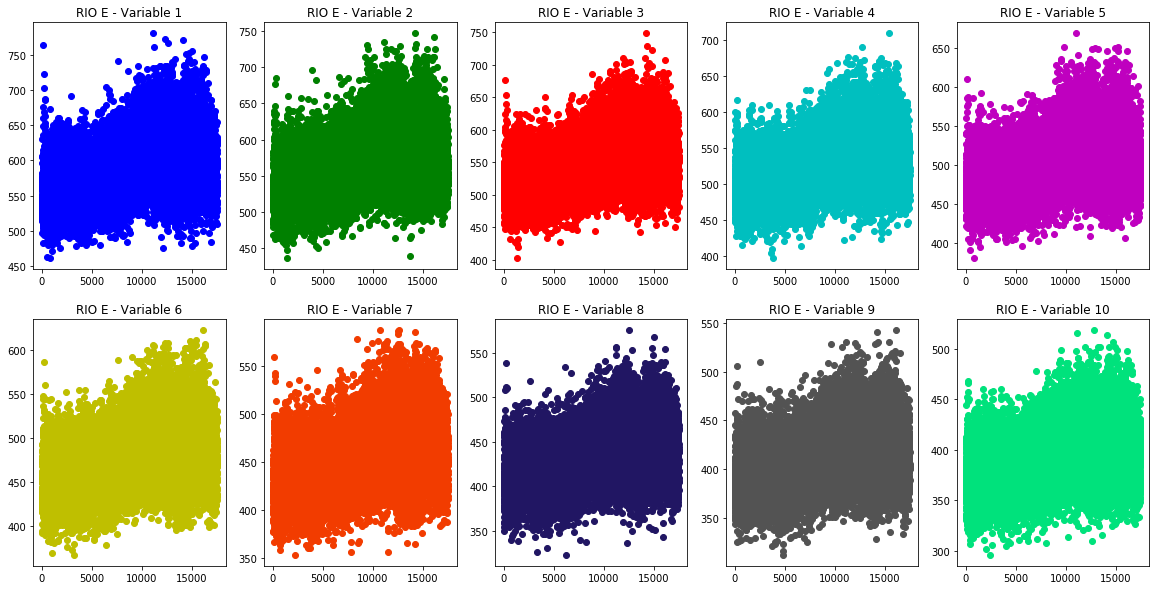

In [77]:
fig = plt.figure()

for x in range(0,10):
    plt.subplot(2, 5, x+1)
    plt.scatter(range(0,fit_E[:,x].shape[0]), fit_E[:,x], color=colors[x])
    plt.title('RIO E - Variable {}'.format(x+1))
plt.show()

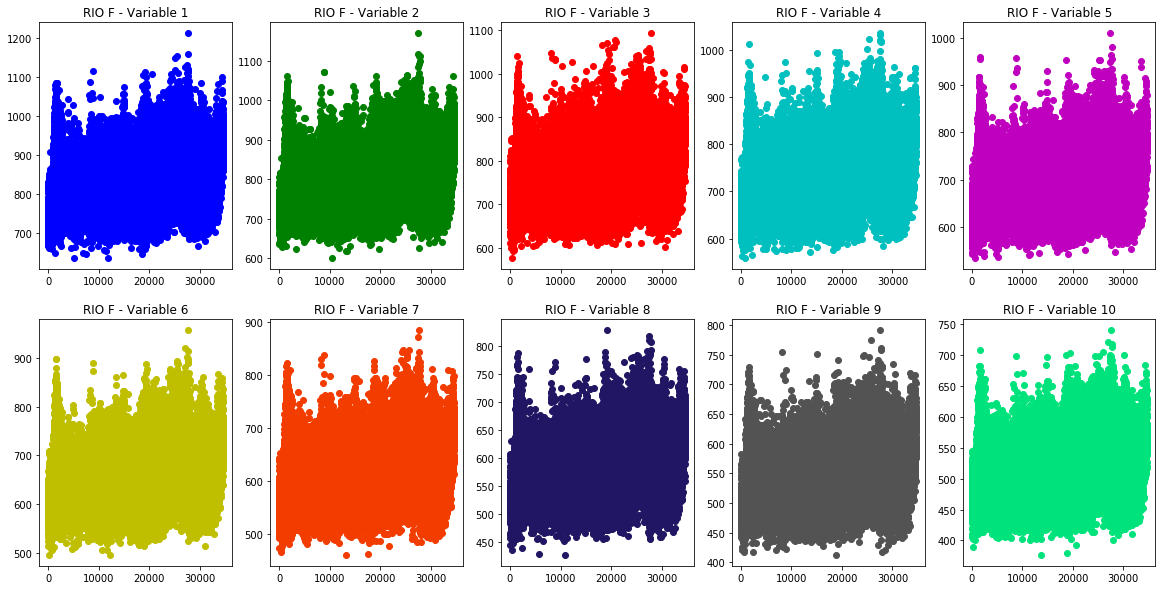

In [78]:
fig = plt.figure()

for x in range(0,10):
    plt.subplot(2, 5, x+1)
    plt.scatter(range(0,fit_F[:,x].shape[0]), fit_F[:,x], color=colors[x])
    plt.title('RIO F - Variable {}'.format(x+1))
plt.show()

# Modelo de Clasificación

In [85]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [192]:
x = np.concatenate((fit_A[0:100,0:5],fit_B[0:100,0:5],fit_C[0:100,0:5], fit_D[0:100,0:5], fit_E[0:100,0:5], fit_F[0:100,0:5]))
y = np.concatenate((y_A[0:100], y_B[0:100], y_C[0:100], y_D[0:100], y_E[0:100], y_F[0:100]))

In [183]:
x.shape

(600, 5)

In [184]:
y.shape

(600,)

In [185]:
model = Sequential()

In [197]:
model.add(Dense(1, input_dim=5, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['acc'])
model.fit(x,y, epochs=3000)

Epoch 1/3000
600/600 [==============================] - 0s 91us/step - loss: 3555.2647 - acc: 0.1600
Epoch 2/3000
600/600 [==============================] - 0s 32us/step - loss: 3543.7229 - acc: 0.1667
Epoch 3/3000
600/600 [==============================] - 0s 32us/step - loss: 3542.8153 - acc: 0.1667
Epoch 4/3000
600/600 [==============================] - 0s 32us/step - loss: 3542.4656 - acc: 0.1667
Epoch 5/3000
600/600 [==============================] - 0s 35us/step - loss: 3542.2796 - acc: 0.1667
Epoch 6/3000
600/600 [==============================] - 0s 32us/step - loss: 3542.1639 - acc: 0.1667
Epoch 7/3000
600/600 [==============================] - 0s 32us/step - loss: 3542.0849 - acc: 0.1667
Epoch 8/3000
600/600 [==============================] - 0s 32us/step - loss: 3542.0276 - acc: 0.1667
Epoch 9/3000
600/600 [==============================] - 0s 32us/step - loss: 3541.9843 - acc: 0.1667
Epoch 10/3000
600/600 [==============================] - 0s 30us/step - loss: 3541.9500 - a

600/600 [==============================] - 0s 30us/step - loss: 3541.6995 - acc: 0.1667
Epoch 82/3000
600/600 [==============================] - 0s 35us/step - loss: 3541.6991 - acc: 0.1667
Epoch 83/3000
600/600 [==============================] - 0s 30us/step - loss: 3541.6987 - acc: 0.1667
Epoch 84/3000
600/600 [==============================] - 0s 27us/step - loss: 3541.6982 - acc: 0.1667
Epoch 85/3000
600/600 [==============================] - 0s 27us/step - loss: 3541.6979 - acc: 0.1667
Epoch 86/3000
600/600 [==============================] - 0s 28us/step - loss: 3541.6976 - acc: 0.1667
Epoch 87/3000
600/600 [==============================] - 0s 27us/step - loss: 3541.6972 - acc: 0.1667
Epoch 88/3000
600/600 [==============================] - 0s 27us/step - loss: 3541.6968 - acc: 0.1667
Epoch 89/3000
600/600 [==============================] - 0s 28us/step - loss: 3541.6964 - acc: 0.1667
Epoch 90/3000
600/600 [==============================] - 0s 30us/step - loss: 3541.6962 - acc: 0

600/600 [==============================] - 0s 32us/step - loss: 3541.6832 - acc: 0.1667
Epoch 161/3000
600/600 [==============================] - 0s 28us/step - loss: 3541.6832 - acc: 0.1667
Epoch 162/3000
600/600 [==============================] - 0s 30us/step - loss: 3541.6829 - acc: 0.1667
Epoch 163/3000
600/600 [==============================] - 0s 27us/step - loss: 3541.6828 - acc: 0.1667
Epoch 164/3000
600/600 [==============================] - 0s 28us/step - loss: 3541.6828 - acc: 0.1667
Epoch 165/3000
600/600 [==============================] - 0s 27us/step - loss: 3541.6828 - acc: 0.1667
Epoch 166/3000
600/600 [==============================] - 0s 25us/step - loss: 3541.6828 - acc: 0.1667
Epoch 167/3000
600/600 [==============================] - 0s 27us/step - loss: 3541.6827 - acc: 0.1667
Epoch 168/3000
600/600 [==============================] - 0s 27us/step - loss: 3541.6825 - acc: 0.1667
Epoch 169/3000
600/600 [==============================] - 0s 25us/step - loss: 3541.6822

600/600 [==============================] - 0s 28us/step - loss: 3541.6776 - acc: 0.1667
Epoch 240/3000
600/600 [==============================] - 0s 28us/step - loss: 3541.6775 - acc: 0.1667
Epoch 241/3000
600/600 [==============================] - 0s 27us/step - loss: 3541.6775 - acc: 0.1667
Epoch 242/3000
600/600 [==============================] - 0s 28us/step - loss: 3541.6775 - acc: 0.1667
Epoch 243/3000
600/600 [==============================] - 0s 25us/step - loss: 3541.6775 - acc: 0.1667
Epoch 244/3000
600/600 [==============================] - 0s 27us/step - loss: 3541.6774 - acc: 0.1667
Epoch 245/3000
600/600 [==============================] - 0s 30us/step - loss: 3541.6775 - acc: 0.1667
Epoch 246/3000
600/600 [==============================] - 0s 25us/step - loss: 3541.6774 - acc: 0.1667
Epoch 247/3000
600/600 [==============================] - 0s 27us/step - loss: 3541.6774 - acc: 0.1667
Epoch 248/3000
600/600 [==============================] - 0s 27us/step - loss: 3541.6774

600/600 [==============================] - 0s 27us/step - loss: 3541.6750 - acc: 0.1667
Epoch 319/3000
600/600 [==============================] - 0s 30us/step - loss: 3541.6750 - acc: 0.1667
Epoch 320/3000
600/600 [==============================] - 0s 28us/step - loss: 3541.6750 - acc: 0.1667
Epoch 321/3000
600/600 [==============================] - 0s 25us/step - loss: 3541.6750 - acc: 0.1667
Epoch 322/3000
600/600 [==============================] - 0s 27us/step - loss: 3541.6750 - acc: 0.1667
Epoch 323/3000
600/600 [==============================] - 0s 27us/step - loss: 3541.6749 - acc: 0.1667
Epoch 324/3000
600/600 [==============================] - 0s 28us/step - loss: 3541.6750 - acc: 0.1667
Epoch 325/3000
600/600 [==============================] - 0s 28us/step - loss: 3541.6749 - acc: 0.1667
Epoch 326/3000
600/600 [==============================] - 0s 28us/step - loss: 3541.6749 - acc: 0.1667
Epoch 327/3000
600/600 [==============================] - 0s 27us/step - loss: 3541.6750

600/600 [==============================] - 0s 28us/step - loss: 3541.6735 - acc: 0.1667
Epoch 398/3000
600/600 [==============================] - 0s 28us/step - loss: 3541.6734 - acc: 0.1667
Epoch 399/3000
600/600 [==============================] - 0s 38us/step - loss: 3541.6735 - acc: 0.1667
Epoch 400/3000
600/600 [==============================] - 0s 28us/step - loss: 3541.6734 - acc: 0.1667
Epoch 401/3000
600/600 [==============================] - 0s 27us/step - loss: 3541.6734 - acc: 0.1667
Epoch 402/3000
600/600 [==============================] - ETA: 0s - loss: 3886.7261 - acc: 0.03 - 0s 27us/step - loss: 3541.6734 - acc: 0.1667
Epoch 403/3000
600/600 [==============================] - 0s 25us/step - loss: 3541.6734 - acc: 0.1667
Epoch 404/3000
600/600 [==============================] - 0s 25us/step - loss: 3541.6734 - acc: 0.1667
Epoch 405/3000
600/600 [==============================] - 0s 25us/step - loss: 3541.6734 - acc: 0.1667
Epoch 406/3000
600/600 [========================

600/600 [==============================] - 0s 37us/step - loss: 3541.6721 - acc: 0.1667
Epoch 476/3000
600/600 [==============================] - 0s 30us/step - loss: 3541.6721 - acc: 0.1667
Epoch 477/3000
600/600 [==============================] - 0s 28us/step - loss: 3541.6721 - acc: 0.1667
Epoch 478/3000
600/600 [==============================] - 0s 27us/step - loss: 3541.6720 - acc: 0.1667
Epoch 479/3000
600/600 [==============================] - 0s 27us/step - loss: 3541.6720 - acc: 0.1667
Epoch 480/3000
600/600 [==============================] - 0s 28us/step - loss: 3541.6721 - acc: 0.1667
Epoch 481/3000
600/600 [==============================] - 0s 28us/step - loss: 3541.6720 - acc: 0.1667
Epoch 482/3000
600/600 [==============================] - 0s 27us/step - loss: 3541.6721 - acc: 0.1667
Epoch 483/3000
600/600 [==============================] - 0s 28us/step - loss: 3541.6720 - acc: 0.1667
Epoch 484/3000
600/600 [==============================] - 0s 27us/step - loss: 3541.6720

600/600 [==============================] - 0s 28us/step - loss: 3541.6712 - acc: 0.1667
Epoch 555/3000
600/600 [==============================] - 0s 30us/step - loss: 3541.6712 - acc: 0.1667
Epoch 556/3000
600/600 [==============================] - 0s 43us/step - loss: 3541.6712 - acc: 0.1667
Epoch 557/3000
600/600 [==============================] - 0s 30us/step - loss: 3541.6712 - acc: 0.1667
Epoch 558/3000
600/600 [==============================] - 0s 28us/step - loss: 3541.6712 - acc: 0.1667
Epoch 559/3000
600/600 [==============================] - 0s 50us/step - loss: 3541.6712 - acc: 0.1667
Epoch 560/3000
600/600 [==============================] - 0s 33us/step - loss: 3541.6712 - acc: 0.1667
Epoch 561/3000
600/600 [==============================] - 0s 30us/step - loss: 3541.6711 - acc: 0.1667
Epoch 562/3000
600/600 [==============================] - 0s 27us/step - loss: 3541.6712 - acc: 0.1667
Epoch 563/3000
600/600 [==============================] - 0s 27us/step - loss: 3541.6712

600/600 [==============================] - 0s 28us/step - loss: 3541.6706 - acc: 0.1667
Epoch 634/3000
600/600 [==============================] - 0s 27us/step - loss: 3541.6706 - acc: 0.1667
Epoch 635/3000
600/600 [==============================] - 0s 27us/step - loss: 3541.6707 - acc: 0.1667
Epoch 636/3000
600/600 [==============================] - 0s 25us/step - loss: 3541.6706 - acc: 0.1667
Epoch 637/3000
600/600 [==============================] - 0s 27us/step - loss: 3541.6706 - acc: 0.1667
Epoch 638/3000
600/600 [==============================] - 0s 25us/step - loss: 3541.6706 - acc: 0.1667
Epoch 639/3000
600/600 [==============================] - 0s 24us/step - loss: 3541.6707 - acc: 0.1667
Epoch 640/3000
600/600 [==============================] - 0s 27us/step - loss: 3541.6706 - acc: 0.1667
Epoch 641/3000
600/600 [==============================] - 0s 27us/step - loss: 3541.6706 - acc: 0.1667
Epoch 642/3000
600/600 [==============================] - 0s 27us/step - loss: 3541.6707

600/600 [==============================] - 0s 27us/step - loss: 3541.6706 - acc: 0.1667
Epoch 713/3000
600/600 [==============================] - 0s 28us/step - loss: 3541.6707 - acc: 0.1667
Epoch 714/3000
600/600 [==============================] - 0s 28us/step - loss: 3541.6706 - acc: 0.1667
Epoch 715/3000
600/600 [==============================] - 0s 28us/step - loss: 3541.6706 - acc: 0.1667
Epoch 716/3000
600/600 [==============================] - 0s 28us/step - loss: 3541.6706 - acc: 0.1667
Epoch 717/3000
600/600 [==============================] - 0s 28us/step - loss: 3541.6706 - acc: 0.1667
Epoch 718/3000
600/600 [==============================] - 0s 27us/step - loss: 3541.6706 - acc: 0.1667
Epoch 719/3000
600/600 [==============================] - 0s 28us/step - loss: 3541.6705 - acc: 0.1667
Epoch 720/3000
600/600 [==============================] - 0s 27us/step - loss: 3541.6706 - acc: 0.1667
Epoch 721/3000
600/600 [==============================] - 0s 27us/step - loss: 3541.6706

600/600 [==============================] - 0s 30us/step - loss: 3541.6699 - acc: 0.1667
Epoch 792/3000
600/600 [==============================] - 0s 28us/step - loss: 3541.6699 - acc: 0.1667
Epoch 793/3000
600/600 [==============================] - 0s 27us/step - loss: 3541.6699 - acc: 0.1667
Epoch 794/3000
600/600 [==============================] - 0s 28us/step - loss: 3541.6698 - acc: 0.1667
Epoch 795/3000
600/600 [==============================] - 0s 27us/step - loss: 3541.6698 - acc: 0.1667
Epoch 796/3000
600/600 [==============================] - 0s 28us/step - loss: 3541.6699 - acc: 0.1667
Epoch 797/3000
600/600 [==============================] - 0s 32us/step - loss: 3541.6699 - acc: 0.1667
Epoch 798/3000
600/600 [==============================] - 0s 27us/step - loss: 3541.6699 - acc: 0.1667
Epoch 799/3000
600/600 [==============================] - 0s 28us/step - loss: 3541.6698 - acc: 0.1667
Epoch 800/3000
600/600 [==============================] - 0s 28us/step - loss: 3541.6699

600/600 [==============================] - 0s 30us/step - loss: 3541.6697 - acc: 0.1667
Epoch 871/3000
600/600 [==============================] - 0s 28us/step - loss: 3541.6698 - acc: 0.1667
Epoch 872/3000
600/600 [==============================] - 0s 25us/step - loss: 3541.6697 - acc: 0.1667
Epoch 873/3000
600/600 [==============================] - 0s 25us/step - loss: 3541.6697 - acc: 0.1667
Epoch 874/3000
600/600 [==============================] - 0s 27us/step - loss: 3541.6697 - acc: 0.1667
Epoch 875/3000
600/600 [==============================] - 0s 27us/step - loss: 3541.6697 - acc: 0.1667
Epoch 876/3000
600/600 [==============================] - 0s 25us/step - loss: 3541.6697 - acc: 0.1667
Epoch 877/3000
600/600 [==============================] - 0s 28us/step - loss: 3541.6698 - acc: 0.1667
Epoch 878/3000
600/600 [==============================] - 0s 28us/step - loss: 3541.6697 - acc: 0.1667
Epoch 879/3000
600/600 [==============================] - 0s 28us/step - loss: 3541.6698

600/600 [==============================] - 0s 30us/step - loss: 3541.6695 - acc: 0.1667
Epoch 950/3000
600/600 [==============================] - 0s 30us/step - loss: 3541.6694 - acc: 0.1667
Epoch 951/3000
600/600 [==============================] - 0s 27us/step - loss: 3541.6694 - acc: 0.1667
Epoch 952/3000
600/600 [==============================] - 0s 27us/step - loss: 3541.6694 - acc: 0.1667
Epoch 953/3000
600/600 [==============================] - 0s 25us/step - loss: 3541.6695 - acc: 0.1667
Epoch 954/3000
600/600 [==============================] - 0s 27us/step - loss: 3541.6695 - acc: 0.1667
Epoch 955/3000
600/600 [==============================] - 0s 27us/step - loss: 3541.6694 - acc: 0.1667
Epoch 956/3000
600/600 [==============================] - 0s 28us/step - loss: 3541.6694 - acc: 0.1667
Epoch 957/3000
600/600 [==============================] - 0s 27us/step - loss: 3541.6695 - acc: 0.1667
Epoch 958/3000
600/600 [==============================] - 0s 28us/step - loss: 3541.6694

600/600 [==============================] - 0s 28us/step - loss: 3541.6692 - acc: 0.1667
Epoch 1029/3000
600/600 [==============================] - 0s 33us/step - loss: 3541.6692 - acc: 0.1667
Epoch 1030/3000
600/600 [==============================] - 0s 30us/step - loss: 3541.6691 - acc: 0.1667
Epoch 1031/3000
600/600 [==============================] - 0s 30us/step - loss: 3541.6691 - acc: 0.1667
Epoch 1032/3000
600/600 [==============================] - 0s 25us/step - loss: 3541.6691 - acc: 0.1667
Epoch 1033/3000
600/600 [==============================] - 0s 30us/step - loss: 3541.6692 - acc: 0.1667
Epoch 1034/3000
600/600 [==============================] - 0s 28us/step - loss: 3541.6692 - acc: 0.1667
Epoch 1035/3000
600/600 [==============================] - 0s 28us/step - loss: 3541.6692 - acc: 0.1667
Epoch 1036/3000
600/600 [==============================] - 0s 27us/step - loss: 3541.6692 - acc: 0.1667
Epoch 1037/3000
600/600 [==============================] - 0s 27us/step - loss: 

600/600 [==============================] - 0s 28us/step - loss: 3541.6689 - acc: 0.1667
Epoch 1107/3000
600/600 [==============================] - 0s 30us/step - loss: 3541.6690 - acc: 0.1667
Epoch 1108/3000
600/600 [==============================] - 0s 28us/step - loss: 3541.6691 - acc: 0.1667
Epoch 1109/3000
600/600 [==============================] - 0s 28us/step - loss: 3541.6690 - acc: 0.1667
Epoch 1110/3000
600/600 [==============================] - 0s 30us/step - loss: 3541.6690 - acc: 0.1667
Epoch 1111/3000
600/600 [==============================] - 0s 28us/step - loss: 3541.6690 - acc: 0.1667
Epoch 1112/3000
600/600 [==============================] - 0s 27us/step - loss: 3541.6690 - acc: 0.1667
Epoch 1113/3000
600/600 [==============================] - 0s 32us/step - loss: 3541.6690 - acc: 0.1667
Epoch 1114/3000
600/600 [==============================] - 0s 32us/step - loss: 3541.6690 - acc: 0.1667
Epoch 1115/3000
600/600 [==============================] - 0s 30us/step - loss: 

600/600 [==============================] - 0s 27us/step - loss: 3541.6690 - acc: 0.1667
Epoch 1185/3000
600/600 [==============================] - 0s 27us/step - loss: 3541.6690 - acc: 0.1667
Epoch 1186/3000
600/600 [==============================] - 0s 28us/step - loss: 3541.6689 - acc: 0.1667
Epoch 1187/3000
600/600 [==============================] - 0s 32us/step - loss: 3541.6689 - acc: 0.1667
Epoch 1188/3000
600/600 [==============================] - 0s 33us/step - loss: 3541.6690 - acc: 0.1667
Epoch 1189/3000
600/600 [==============================] - 0s 38us/step - loss: 3541.6690 - acc: 0.1667
Epoch 1190/3000
600/600 [==============================] - 0s 30us/step - loss: 3541.6690 - acc: 0.1667
Epoch 1191/3000
600/600 [==============================] - 0s 37us/step - loss: 3541.6690 - acc: 0.1667
Epoch 1192/3000
600/600 [==============================] - 0s 33us/step - loss: 3541.6690 - acc: 0.1667
Epoch 1193/3000
600/600 [==============================] - 0s 27us/step - loss: 

600/600 [==============================] - 0s 28us/step - loss: 3541.6689 - acc: 0.1667
Epoch 1263/3000
600/600 [==============================] - 0s 38us/step - loss: 3541.6689 - acc: 0.1667
Epoch 1264/3000
600/600 [==============================] - 0s 28us/step - loss: 3541.6689 - acc: 0.1667
Epoch 1265/3000
600/600 [==============================] - 0s 28us/step - loss: 3541.6689 - acc: 0.1667
Epoch 1266/3000
600/600 [==============================] - 0s 27us/step - loss: 3541.6689 - acc: 0.1667
Epoch 1267/3000
600/600 [==============================] - 0s 25us/step - loss: 3541.6689 - acc: 0.1667
Epoch 1268/3000
600/600 [==============================] - 0s 38us/step - loss: 3541.6689 - acc: 0.1667
Epoch 1269/3000
600/600 [==============================] - 0s 28us/step - loss: 3541.6690 - acc: 0.1667
Epoch 1270/3000
600/600 [==============================] - 0s 27us/step - loss: 3541.6689 - acc: 0.1667
Epoch 1271/3000
600/600 [==============================] - 0s 27us/step - loss: 

600/600 [==============================] - 0s 27us/step - loss: 3541.6689 - acc: 0.1667
Epoch 1341/3000
600/600 [==============================] - 0s 28us/step - loss: 3541.6689 - acc: 0.1667
Epoch 1342/3000
600/600 [==============================] - 0s 28us/step - loss: 3541.6689 - acc: 0.1667
Epoch 1343/3000
600/600 [==============================] - 0s 27us/step - loss: 3541.6689 - acc: 0.1667
Epoch 1344/3000
600/600 [==============================] - 0s 27us/step - loss: 3541.6689 - acc: 0.1667
Epoch 1345/3000
600/600 [==============================] - 0s 28us/step - loss: 3541.6689 - acc: 0.1667
Epoch 1346/3000
600/600 [==============================] - 0s 27us/step - loss: 3541.6689 - acc: 0.1667
Epoch 1347/3000
600/600 [==============================] - 0s 25us/step - loss: 3541.6689 - acc: 0.1667
Epoch 1348/3000
600/600 [==============================] - 0s 27us/step - loss: 3541.6689 - acc: 0.1667
Epoch 1349/3000
600/600 [==============================] - 0s 27us/step - loss: 

600/600 [==============================] - 0s 28us/step - loss: 3541.6684 - acc: 0.1667
Epoch 1419/3000
600/600 [==============================] - 0s 30us/step - loss: 3541.6684 - acc: 0.1667
Epoch 1420/3000
600/600 [==============================] - 0s 27us/step - loss: 3541.6684 - acc: 0.1667
Epoch 1421/3000
600/600 [==============================] - 0s 27us/step - loss: 3541.6684 - acc: 0.1667
Epoch 1422/3000
600/600 [==============================] - 0s 27us/step - loss: 3541.6684 - acc: 0.1667
Epoch 1423/3000
600/600 [==============================] - 0s 28us/step - loss: 3541.6684 - acc: 0.1667
Epoch 1424/3000
600/600 [==============================] - 0s 28us/step - loss: 3541.6684 - acc: 0.1667
Epoch 1425/3000
600/600 [==============================] - 0s 30us/step - loss: 3541.6684 - acc: 0.1667
Epoch 1426/3000
600/600 [==============================] - 0s 30us/step - loss: 3541.6684 - acc: 0.1667
Epoch 1427/3000
600/600 [==============================] - 0s 28us/step - loss: 

600/600 [==============================] - 0s 30us/step - loss: 3541.6684 - acc: 0.1667
Epoch 1497/3000
600/600 [==============================] - 0s 32us/step - loss: 3541.6684 - acc: 0.1667
Epoch 1498/3000
600/600 [==============================] - 0s 30us/step - loss: 3541.6683 - acc: 0.1667
Epoch 1499/3000
600/600 [==============================] - 0s 28us/step - loss: 3541.6683 - acc: 0.1667
Epoch 1500/3000
600/600 [==============================] - 0s 28us/step - loss: 3541.6683 - acc: 0.1667
Epoch 1501/3000
600/600 [==============================] - 0s 28us/step - loss: 3541.6684 - acc: 0.1667
Epoch 1502/3000
600/600 [==============================] - 0s 27us/step - loss: 3541.6683 - acc: 0.1667
Epoch 1503/3000
600/600 [==============================] - 0s 27us/step - loss: 3541.6684 - acc: 0.1667
Epoch 1504/3000
600/600 [==============================] - 0s 27us/step - loss: 3541.6684 - acc: 0.1667
Epoch 1505/3000
600/600 [==============================] - 0s 28us/step - loss: 

600/600 [==============================] - 0s 28us/step - loss: 3541.6683 - acc: 0.1667
Epoch 1575/3000
600/600 [==============================] - 0s 28us/step - loss: 3541.6682 - acc: 0.1667
Epoch 1576/3000
600/600 [==============================] - 0s 32us/step - loss: 3541.6682 - acc: 0.1667
Epoch 1577/3000
600/600 [==============================] - 0s 28us/step - loss: 3541.6682 - acc: 0.1667
Epoch 1578/3000
600/600 [==============================] - 0s 27us/step - loss: 3541.6682 - acc: 0.1667
Epoch 1579/3000
600/600 [==============================] - 0s 28us/step - loss: 3541.6682 - acc: 0.1667
Epoch 1580/3000
600/600 [==============================] - 0s 27us/step - loss: 3541.6682 - acc: 0.1667
Epoch 1581/3000
600/600 [==============================] - 0s 28us/step - loss: 3541.6683 - acc: 0.1667
Epoch 1582/3000
600/600 [==============================] - 0s 25us/step - loss: 3541.6682 - acc: 0.1667
Epoch 1583/3000
600/600 [==============================] - 0s 27us/step - loss: 

KeyboardInterrupt: 

In [191]:
X = np.concatenate((fit_A[0:100,5:10],fit_B[0:100,5:10],fit_C[0:100,5:10], fit_D[0:100,5:10], fit_E[0:100,5:10], fit_F[0:100,5:10]))
Y = np.concatenate((y_A[0:100], y_B[0:100], y_C[0:100], y_D[0:100], y_E[0:100], y_F[0:100]))
z = model.predict(X)
for i, j in zip(Y, z):
    print('{} => {}'.format(i,j))